<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load data
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

# Load data into pandas DataFrames
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv(ratings, sep='::', engine='python' , encoding='latin-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users_df = pd.read_csv(users, sep='::', engine='python', encoding='latin-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [3]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### merge data

In [26]:
# Merge data
# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

In [27]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


## Data Preparation

### Explore variables and check data quality

In [ ]:
# ขนาดของข้อมูล (จำนวนแถวและคอลัมน์)
merged_df.shape

(1000209, 10)

In [ ]:
# ชนิดข้อมูลในแต่ละคอลัมน์
print(merged_df.dtypes)

UserID         int64
MovieID        int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
Title         object
Genres        object
dtype: object


In [ ]:
# ข้อมูลสรุปทั่วไป เช่น ค่าว่าง ประเภท dtype เป็นต้น
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [ ]:
# สำหรับตัวแปรเชิงตัวเลข
merged_df.describe()

# สำหรับตัวแปรเชิงหมวดหมู่
merged_df.describe(include='object')


,Gender,Zip-code,Title,Genres
count,1000209,1000209,1000209,1000209
unique,2,3439,3706,301
top,M,94110,American Beauty (1999),Comedy
freq,753769,3802,3428,116883


In [ ]:
# จำนวนแถวที่ซ้ำกัน
merged_df.duplicated().sum()

# แสดงแถวที่ซ้ำ
merged_df[merged_df.duplicated()]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres


### Handle missing values, outliers, and noises

In [ ]:
merged_df.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0
Genres,0


### Perform feature engineering (optional)

In [28]:
import re

# ดึงปีออกมา
merged_df['Year'] = merged_df['Title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1))
                                            if re.search(r'\((\d{4})\)', x) else None)
# ลบปีออกจากชื่อเรื่อง
merged_df['Title'] = merged_df['Title'].apply(lambda x: re.sub(r'\(\d{4}\)', '', x).strip())

In [29]:
merged_df['Gender'] = merged_df['Gender'].map({'M': 1, 'F': 0})

In [30]:
# แยกคอลัมน์ Genres ด้วยตัวคั่น '|'
# โดยจำกัดจำนวนคอลัมน์สูงสุดเป็น 3 (สามารถเพิ่มหรือลดตามความเหมาะสม)
split_genres = merged_df['Genres'].str.split('|', expand=True)

# ตั้งชื่อคอลัมน์ใหม่ Genre1, Genre2, Genre3 โดยใช้ iloc เพื่อเลือกคอลัมน์ที่ต้องการ
merged_df['Genre1'] = split_genres.iloc[:, 0]
merged_df['Genre2'] = split_genres.iloc[:, 1]
merged_df['Genre3'] = split_genres.iloc[:, 2]

# ลบคอลัมน์ Genres ออก
merged_df = merged_df.drop(columns=['Genres'])

In [31]:
# Date Time
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')
merged_df['Month_Rated'] = merged_df['Datetime'].dt.month
merged_df['Hour_Rated'] = merged_df['Datetime'].dt.time


In [32]:
# ฟังก์ชันเพื่อแปลง Genre เป็นตัวเลข
def genre_to_number(genre):
    # ถ้า genre เป็น None หรือค่าว่าง ให้คืนค่า 0
    if genre is None or genre == '':
        return 0

    # Check if genre is of type int or float before proceeding
    if isinstance(genre, (int, float)):
        return genre  # Return the value as is if it's already numeric

    genre_dict = {
        "Action": 1,
        "Adventure": 2,
        "Animation": 3,
        "Children's": 4,
        "Comedy": 5,
        "Crime": 6,
        "Documentary": 7,
        "Drama": 8,
        "Fantasy": 9,
        "Film-Noir": 10,
        "Horror": 11,
        "Musical": 12,
        "Mystery": 13,
        "Romance": 14,
        "Sci-Fi": 15,
        "Thriller": 16,
        "War": 17,
        "Western": 18,
    }

    # Strip any leading/trailing whitespace and return corresponding value or 0 if not found
    return genre_dict.get(genre.strip(), 0)  # Return 0 for unknown genres

# ใช้ apply เพื่อแปลง Genre1, Genre2, Genre3
merged_df['Genre1'] = merged_df['Genre1'].apply(genre_to_number)
merged_df['Genre2'] = merged_df['Genre2'].apply(genre_to_number)
merged_df['Genre3'] = merged_df['Genre3'].apply(genre_to_number)

In [33]:
merged_df.drop(columns=['Timestamp', 'Zip-code'], inplace=True)

In [34]:
merged_df.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Year,Genre1,Genre2,Genre3,Datetime,Month_Rated,Hour_Rated
0,1,1193,5,0,1,10,One Flew Over the Cuckoo's Nest,1975,8,0,0,2000-12-31 22:12:40,12,22:12:40
1,1,661,3,0,1,10,James and the Giant Peach,1996,3,4,12,2000-12-31 22:35:09,12,22:35:09
2,1,914,3,0,1,10,My Fair Lady,1964,12,14,0,2000-12-31 22:32:48,12,22:32:48
3,1,3408,4,0,1,10,Erin Brockovich,2000,8,0,0,2000-12-31 22:04:35,12,22:04:35
4,1,2355,5,0,1,10,"Bug's Life, A",1998,3,4,5,2001-01-06 23:38:11,1,23:38:11


## Explore Data

#### Descriptive statistics

In [ ]:
num_users = merged_df['UserID'].nunique()
num_movies = merged_df['MovieID'].nunique()
num_ratings = len(merged_df)

print(f"จำนวนผู้ใช้ทั้งหมด: {num_users}")
print(f"จำนวนภาพยนตร์ทั้งหมด: {num_movies}")
print(f"จำนวนการให้คะแนนทั้งหมด: {num_ratings}")


จำนวนผู้ใช้ทั้งหมด: 6040
จำนวนภาพยนตร์ทั้งหมด: 3706
จำนวนการให้คะแนนทั้งหมด: 1000209


In [ ]:
rating_mean = merged_df['Rating'].mean()
rating_median = merged_df['Rating'].median()
rating_std = merged_df['Rating'].std()
rating_min = merged_df['Rating'].min()
rating_max = merged_df['Rating'].max()
rating_quartiles = merged_df['Rating'].quantile([0.25, 0.5, 0.75])

print(f"ค่าเฉลี่ยของ Rating: {rating_mean:.2f}")
print(f"มัธยฐานของ Rating: {rating_median}")
print(f"การกระจาย (Std) ของ Rating: {rating_std:.2f}")
print(f"Min Rating: {rating_min}, Max Rating: {rating_max}")
print("Quartiles ของ Rating:")
print(rating_quartiles)

ค่าเฉลี่ยของ Rating: 3.58
มัธยฐานของ Rating: 4.0
การกระจาย (Std) ของ Rating: 1.12
Min Rating: 1, Max Rating: 5
Quartiles ของ Rating:
0.25   3.00
0.50   4.00
0.75   4.00
Name: Rating, dtype: float64


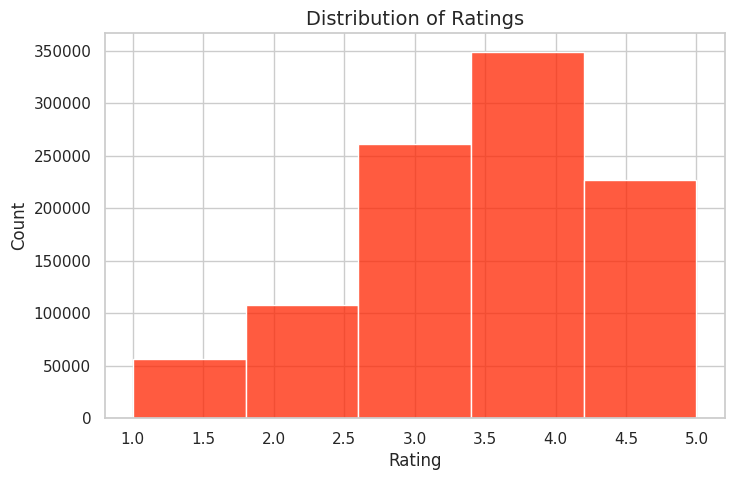

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(merged_df['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
merged_df.groupby('Gender')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,246440.00,3.62,1.11,1.00,3.00,4.00,4.00,5.00
1,753769.00,3.57,1.12,1.00,3.00,4.00,4.00,5.00


In [ ]:
merged_df.groupby('UserID')['Rating'].mean().describe()

,Rating
count,6040.00
mean,3.70
std,0.43
min,1.02
25%,3.44
50%,3.74
75%,4.00
max,4.96


In [ ]:
merged_df.groupby('Title')['Rating'].mean()

,Rating
Title,
"$1,000,000 Duck",3.03
'Night Mother,3.37
'Til There Was You,2.69
"'burbs, The",2.91
...And Justice for All,3.71
...,...
"Zed & Two Noughts, A",3.41
Zero Effect,3.75
Zero Kelvin (Kjærlighetens kjøtere),3.50


In [ ]:
merged_df.groupby('Gender')['Rating'].mean()

,Rating
Gender,
0,3.62
1,3.57


In [ ]:
merged_df.groupby('Age')['Rating'].mean()

,Rating
Age,
1,3.55
18,3.51
25,3.55
35,3.62
45,3.64
50,3.71
56,3.77


In [ ]:
merged_df.groupby('Occupation')['Rating'].mean()

,Rating
Occupation,
0,3.54
1,3.58
2,3.57
3,3.66
4,3.54
5,3.54
6,3.66
7,3.60
8,3.47


In [ ]:
# เลือกเฉพาะคอลัมน์ที่เกี่ยวข้อง
Genre_cols = ['Genre1', 'Genre2', 'Genre3']

# melt ให้เป็น long format
Genre_all = merged_df.melt(id_vars=['Rating'], value_vars=Genre_cols,
                         value_name='Genre').drop('variable', axis=1)

# ลบค่า 0 หรือ missing (ถ้าใช้ 0 แทน genre ว่าง)
Genre_all = Genre_all[Genre_all['Genre'] != 0]

Genre_all.groupby('Genre')['Rating'].mean()

,Rating
Genre,
1,3.49
2,3.48
3,3.68
4,3.42
5,3.53
6,3.73
7,3.93
8,3.77
9,3.47


In [ ]:
# 1. คำนวณค่าเฉลี่ยต่อปี
year_mean_rating = merged_df.groupby('Year')['Rating'].mean()
# 2. เรียงจากมากไปน้อย
year_mean_rating_sorted = year_mean_rating.sort_values(ascending=False)

year_mean_rating_sorted

,Rating
Year,
1927,4.28
1941,4.18
1946,4.16
1952,4.13
1957,4.11
...,...
1997,3.41
1996,3.39
2000,3.37


#### Data visualization

#####  เพศชายมีแนวโน้มให้คะแนนสูงกว่าในแนว Action / Sci-Fi / Thriller เพศหญิงให้คะแนนสูงกว่าในแนว Romance / Drama / Comedy



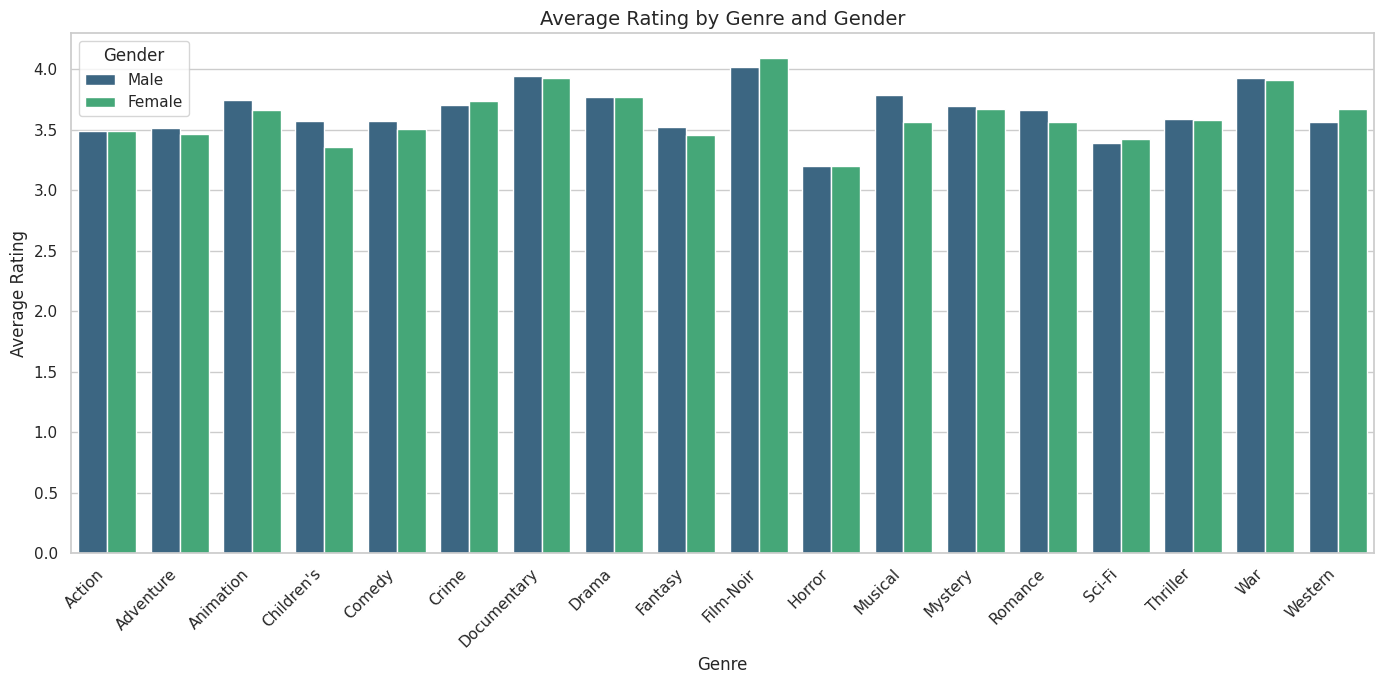

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Melt the DataFrame to have a single 'Genre' column for plotting
genres_melted = merged_df.melt(id_vars=['Gender', 'Rating'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre')

# Filter out rows where Genre is 0 (which represents no genre)
genres_melted = genres_melted[genres_melted['Genre'] != 0]

# Map the numerical genre back to genre names for better readability
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western"
}
genres_melted['GenreName'] = genres_melted['Genre'].map(genre_mapping)

# Group by Gender and GenreName and calculate the mean rating
genre_rating_mean = genres_melted.groupby(['Gender', 'GenreName'])['Rating'].mean().reset_index()

# Map Gender back to string labels for plotting
genre_rating_mean['Gender'] = genre_rating_mean['Gender'].map({0: 'Male', 1: 'Female'})

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='GenreName', y='Rating', hue='Gender', data=genre_rating_mean, palette='viridis')
plt.title('Average Rating by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### เพศหญิงจะมีพฤติกรรมการดูหนังแนว Comedy drama มากกว่าเพศชาย

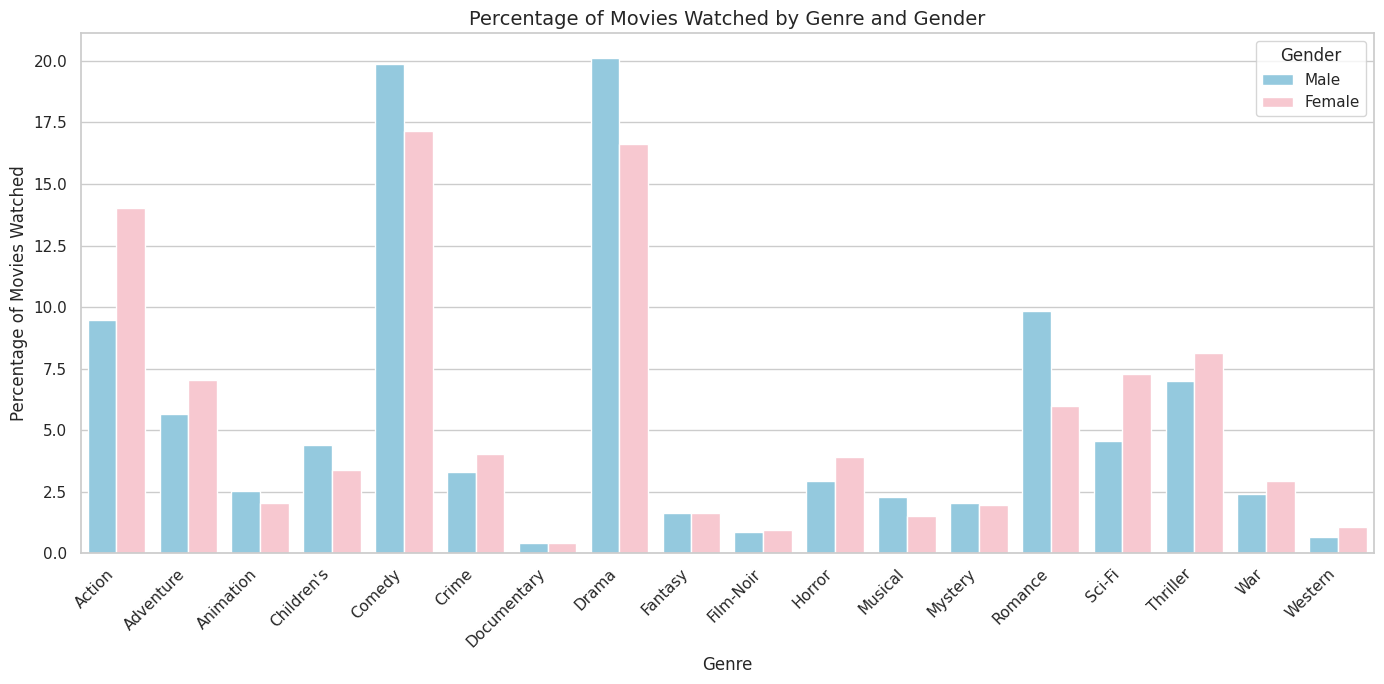

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Melt the DataFrame to have a single 'Genre' column for plotting
genres_melted = merged_df.melt(id_vars=['Gender'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre')

# Filter out rows where Genre is 0 (which represents no genre)
genres_melted = genres_melted[genres_melted['Genre'] != 0]

# Map the numerical genre back to genre names for better readability
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western"
}
genres_melted['GenreName'] = genres_melted['Genre'].map(genre_mapping)

# Group by Gender and GenreName and count the number of movies
genre_counts = genres_melted.groupby(['Gender', 'GenreName']).size().reset_index(name='MovieCount')

# Calculate the total movie count for each gender
total_movie_count_by_gender = genre_counts.groupby('Gender')['MovieCount'].sum().reset_index(name='TotalMovieCount')

# Merge to get the total count for percentage calculation
genre_counts = pd.merge(genre_counts, total_movie_count_by_gender, on='Gender')

# Calculate the percentage
genre_counts['Percentage'] = (genre_counts['MovieCount'] / genre_counts['TotalMovieCount']) * 100

# Map Gender back to string labels for plotting
genre_counts['Gender'] = genre_counts['Gender'].map({0: 'Male', 1: 'Female'})

# Define a custom palette with specific colors for Male and Female
custom_palette = {'Male': 'skyblue', 'Female': 'pink'}

# Create the bar plot comparing movie percentages by genre and gender
plt.figure(figsize=(14, 7))
sns.barplot(x='GenreName', y='Percentage', hue='Gender', data=genre_counts, palette=custom_palette)
plt.title('Percentage of Movies Watched by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Percentage of Movies Watched')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### กลุ่มอาชีพที่มีพื้นฐานด้านเทคโนโลยีหรือศิลปะ (เช่น Programmer, Artist) มีแนวโน้มให้คะแนนสูงกว่าในหนังที่มี concept ซับซ้อน เช่น Sci-Fi หรือ Mystery

In [ ]:
# Get all unique occupations from the merged_df
all_occupations = merged_df['Occupation'].unique()

# Sort the occupations for better readability
all_occupations.sort()

# Print the total number of unique occupations
print(f"Total number of unique occupations: {len(all_occupations)}")

# Optionally, print the list of unique occupations and their corresponding descriptions
occupation_mapping = {
    0: "other or not specified", 1: "academic/educator", 2: "artist",
    3: "clerical/admin", 4: "college/grad student", 5: "customer service",
    6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer",
    13: "retired", 14: "sales/marketing", 15: "scientist",
    16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman",
    19: "unemployed", 20: "writer"
}

print("\nList of unique occupations and their descriptions:")
for occ_code in all_occupations:
    description = occupation_mapping.get(occ_code, "Unknown")
    print(f"Occupation Code {occ_code}: {description}")

Total number of unique occupations: 21

List of unique occupations and their descriptions:
Occupation Code 0: other or not specified
Occupation Code 1: academic/educator
Occupation Code 2: artist
Occupation Code 3: clerical/admin
Occupation Code 4: college/grad student
Occupation Code 5: customer service
Occupation Code 6: doctor/health care
Occupation Code 7: executive/managerial
Occupation Code 8: farmer
Occupation Code 9: homemaker
Occupation Code 10: K-12 student
Occupation Code 11: lawyer
Occupation Code 12: programmer
Occupation Code 13: retired
Occupation Code 14: sales/marketing
Occupation Code 15: scientist
Occupation Code 16: self-employed
Occupation Code 17: technician/engineer
Occupation Code 18: tradesman/craftsman
Occupation Code 19: unemployed
Occupation Code 20: writer


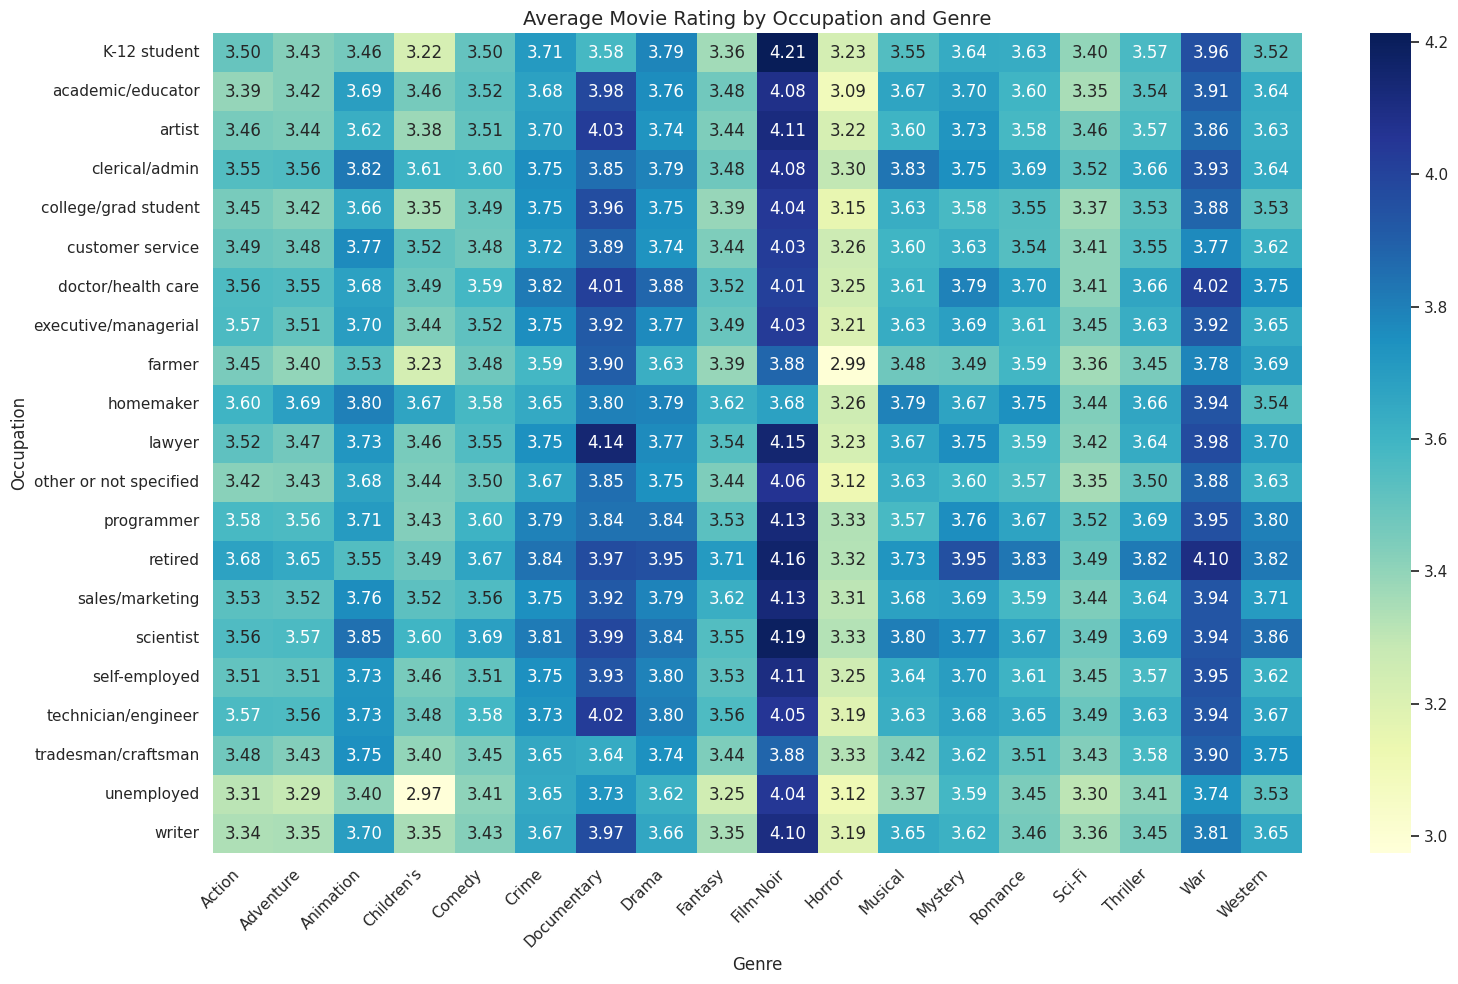

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Melt the DataFrame to have a single 'Genre' column for plotting
genres_melted = merged_df.melt(id_vars=['Occupation', 'Rating'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre')

# Filter out rows where Genre is 0 (which represents no genre)
genres_melted = genres_melted[genres_melted['Genre'] != 0]

# Map the numerical genre back to genre names for better readability
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western"
}
genres_melted['GenreName'] = genres_melted['Genre'].map(genre_mapping)

# Map the numerical occupation back to occupation names for better readability
occupation_mapping = {
    0: "other or not specified", 1: "academic/educator", 2: "artist",
    3: "clerical/admin", 4: "college/grad student", 5: "customer service",
    6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer",
    13: "retired", 14: "sales/marketing", 15: "scientist",
    16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman",
    19: "unemployed", 20: "writer"
}
genres_melted['OccupationName'] = genres_melted['Occupation'].map(occupation_mapping)


# Group by OccupationName and GenreName and calculate the mean rating
occupation_genre_rating_mean = genres_melted.groupby(['OccupationName', 'GenreName'])['Rating'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(occupation_genre_rating_mean, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Movie Rating by Occupation and Genre')
plt.xlabel('Genre')
plt.ylabel('Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Target variable analysis

- Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


In [37]:
# Calculate the correlation matrix
# Exclude non-numerical columns
numerical_df = merged_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,UserID,MovieID,Rating,Gender,Age,Occupation,Year,Genre1,Genre2,Genre3
UserID,1.000000,-0.017739,0.012303,-0.035042,0.034688,-0.026698,-0.031795,0.005981,0.003068,0.001397
MovieID,-0.017739,1.000000,-0.064042,0.021626,0.027575,0.008585,-0.014035,0.039828,-0.075916,-0.136118
Rating,0.012303,-0.064042,1.000000,-0.019861,0.056869,0.006753,-0.156946,0.041356,0.020067,-0.001561
Gender,-0.035042,0.021626,-0.019861,1.000000,-0.003189,0.114974,-0.002831,-0.045308,-0.000989,0.035590
Age,0.034688,0.027575,0.056869,-0.003189,1.000000,0.078371,-0.165870,0.062423,0.021284,-0.007733
Occupation,-0.026698,0.008585,0.006753,0.114974,0.078371,1.000000,-0.010489,-0.009637,0.008258,0.013408
Year,-0.031795,-0.014035,-0.156946,-0.002831,-0.165870,-0.010489,1.000000,-0.129037,-0.008150,0.012994
Genre1,0.005981,0.039828,0.041356,-0.045308,0.062423,-0.009637,-0.129037,1.000000,-0.039376,-0.389497
Genre2,0.003068,-0.075916,0.020067,-0.000989,0.021284,0.008258,-0.008150,-0.039376,1.000000,0.089175
Genre3,0.001397,-0.136118,-0.001561,0.035590,-0.007733,0.013408,0.012994,-0.389497,0.089175,1.000000


## Data Modeling

#### Model RandomForest

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# โหลดข้อมูล
df = merged_df  # เปลี่ยนเป็นไฟล์ของคุณ

# สร้าง Target: ชอบ = Rating >= 4
# 0 = dont'like 1 = like
df['Liked'] = (df['Rating'] >= 4).astype(int)

# สร้าง AgeGroup (optional สำหรับวิเคราะห์กลุ่มอายุ)
def age_group(age):
    if age <= 18:
        return "Teen"
    elif age <= 35:
        return "Young Adult"
    elif age <= 50:
        return "Adult"
    else:
        return "Senior"
df['AgeGroup'] = df['Age'].apply(age_group)

In [ ]:
# Partition data

# Handle imbalance data (optional)

# Model selection and tuning

# Evaluate models

In [45]:
# Partition data
# เลือก Features
features = ['Age', 'Gender', 'Occupation', 'Genre1', 'Genre2', 'Genre3']
X = df[features]
y = df['Liked']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and tuning
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate models
y_pred = rf.predict(X_test)
# ตรวจสอบ accuracy
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

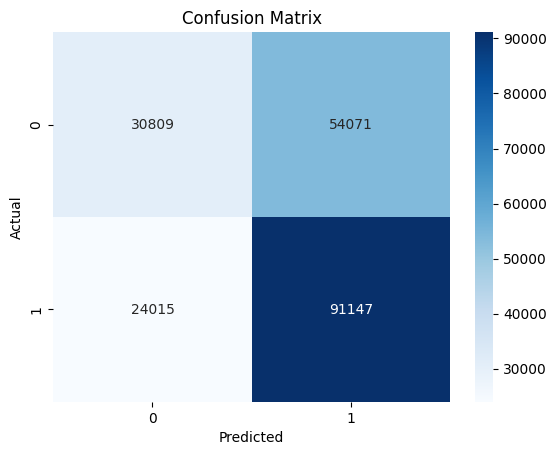

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### แนะนำหนัง ตาม เพศ กลุ่มอายุ กลุ่มอาชีพ

In [18]:
def recommend_top_n(user_features, df, model, n=5):
    # หนังทั้งหมด
    all_movies = df[['MovieID', 'Title', 'Genre1', 'Genre2', 'Genre3']].drop_duplicates().copy() # Add .copy() to avoid SettingWithCopyWarning

    # สร้าง dataframe สำหรับทำนาย
    temp = all_movies.copy()
    temp['Age'] = user_features['Age']
    temp['Gender'] = user_features['Gender']
    temp['Occupation'] = user_features['Occupation']

    # Select only the features used during training
    features_for_prediction = ['Age', 'Gender', 'Occupation', 'Genre1', 'Genre2', 'Genre3']

    # predict probability ว่าผู้ใช้จะชอบ
    temp['Liked_Prob'] = model.predict_proba(temp[features_for_prediction])[:,1]

    # เลือก Top-N
    top_n = temp.sort_values('Liked_Prob', ascending=False).head(n)
    return top_n[['Title', 'Liked_Prob', 'Genre1', 'Genre2', 'Genre3']] # Include genre columns

In [21]:
# สร้าง dictionary สำหรับเก็บผลลัพธ์
recommendations_by_group = {}

# group ตาม AgeGroup, Gender, Occupation
grouped = df.groupby(['AgeGroup', 'Gender', 'Occupation'])

# Map numerical genre codes back to names
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western", 0: "Unknown"
}

occupation_mapping = {
    0: "Other/General",
    1: "Education/Academia",
    2: "Arts/Media",
    3: "Business/Management",
    4: "Education/Academia",
    5: "Business/Management",
    6: "Professional Services",
    7: "Business/Management",
    8: "Other/General",
    9: "Other/General",
    10: "Education/Academia",
    11: "Professional Services",
    12: "STEM/Technical",
    13: "Other/General",
    14: "Business/Management",
    15: "STEM/Technical",
    16: "Other/General",
    17: "STEM/Technical",
    18: "Other/General",
    19: "Other/General",
    20: "Arts/Media"
}

for group_keys, group_df in grouped:
    age_group, gender, occupation = group_keys
    group_users = group_df[['Age', 'Gender', 'Occupation']].drop_duplicates()
    group_recs_list = [] # Use a list to store recommended movies with genres

    for _, user_features in group_users.iterrows():
        # Get top 3 recommendations for each user in the group
        recs = recommend_top_n(user_features, df, rf, n=3)

        # Process recommendations to extract title and existing genres
        for index, row in recs.iterrows():
            movie_info = {'Title': row['Title']}
            # Iterate through potential genre columns and add if they exist and are not 0
            genres = []
            for i in range(1, 4):
                genre_col = f'Genre{i}'
                if genre_col in row and row[genre_col] != 0:
                    genres.append(genre_mapping.get(row[genre_col], 'Unknown'))

            movie_info['Genres'] = genres
            group_recs_list.append(movie_info)


    # Count the occurrences of each movie title within the group
    movie_counts = pd.Series([rec['Title'] for rec in group_recs_list]).value_counts()

    # Get the Top 5 movie titles
    top_movie_titles = movie_counts.head(5).index.tolist()

    # Get the genres for the Top 5 movies from the processed list
    top_genres = {}
    for movie_title in top_movie_titles:
        # Find the first occurrence of the movie in the processed list to get its genres
        movie_rec = next((rec for rec in group_recs_list if rec['Title'] == movie_title), None)
        if movie_rec:
            # Join the list of genre names into a string
            top_genres[movie_title] = ', '.join(movie_rec['Genres']) if movie_rec['Genres'] else 'N/A'

    recommendations_by_group[group_keys] = top_genres

# แสดงผล
for group_keys, movies in recommendations_by_group.items():
    age_group, gender, occupation_code = group_keys
    # Map numerical gender and occupation code back to names for display
    gender_name = 'Female' if gender == 0 else 'Male'
    occupation_name = occupation_mapping.get(occupation_code, 'Unknown')


    print(f"Age Group: {age_group}, Gender: {gender_name}, Occupation: {occupation_name}")
    for i, (movie, genre) in enumerate(movies.items(), 1):
        print(f"{i}. {movie} | Genre: {genre}")
    print("\n")

Age Group: Adult, Gender: Female, Occupation: Other/General
1. So Dear to My Heart | Genre: Children's, Drama
2. Secret Garden, The | Genre: Children's, Drama
3. Little Princess, A | Genre: Children's, Drama
4. Perfect Storm, The | Genre: Action, Adventure, Thriller
5. Anatomy of a Murder | Genre: Drama, Mystery


Age Group: Adult, Gender: Female, Occupation: Education/Academia
1. Cimarron | Genre: Western
2. Davy Crockett, King of the Wild Frontier | Genre: Western
3. Great Locomotive Chase, The | Genre: Adventure, War
4. Original Kings of Comedy, The | Genre: Comedy, Documentary
5. Crossfire | Genre: Crime, Film-Noir


Age Group: Adult, Gender: Female, Occupation: Arts/Media
1. My Fair Lady | Genre: Musical, Romance
2. Vampyros Lesbos (Las Vampiras) | Genre: Horror
3. Carrie | Genre: Horror
4. Ghost | Genre: Comedy, Romance, Thriller
5. Before and After | Genre: Drama, Mystery


Age Group: Adult, Gender: Female, Occupation: Business/Management
1. My Fair Lady | Genre: Musical, Romanc

#### cacifi

In [ ]:
# สมมติ Rating >= 4 คือ High Rating
merged_df['HighRating'] = (merged_df['Rating'] >= 4).astype(int)

In [ ]:
import pandas as pd
df = merged_df
# รวม Genre
df['Genres'] = df[['Genre1','Genre2','Genre3']].apply(lambda x: [g for g in x if g != 0], axis=1)

# สร้าง dummy columns สำหรับทุก Genre
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_, index=df.index)

# รวมกับ feature อื่น
X = pd.concat([df[['Age','Year']], genre_encoded], axis=1)
y = df['HighRating']


#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------

---

## **Data**

---

### **รายละเอียดข้อมูล MovieLens 1M**

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)